In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [44]:
#creating a set of random lat and long combos
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs
#starting url for weather map api call
#import the API key.
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [3]:
# add the lats and longs to a list
coordinates =list(lat_lngs)

In [4]:
#print to display the lat and long combos
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

10.589508568003183 -7.7183068651977464
22.553947062801512 -16.473136484581318
-55.472029740184695 -50.74987280842191
-67.80821057262312 -41.03408539950371
42.97643088303326 -92.74928627770565
-61.91923829558939 78.82526067974453
79.50598680975631 -119.68283770847603
48.1691419376628 -105.30614131378142
3.0012384811786035 49.939770583263936
-56.464006862571495 169.34260892544825
40.33057222426004 171.2859594064223
19.768729103849964 134.24811401287252
-7.603946197647076 61.59912064924691
-40.581831105213176 -145.15284984756428
-61.29267402896334 -162.09449656716873
45.032875666442834 -170.149258758736
-62.1282820657945 -133.42664349772858
-16.70829737255815 43.275871504919564
-11.823094448271519 146.4390086828086
-85.64929428730176 -43.649349922771535
67.08817641316381 -96.4043801227457
-22.241818190241858 141.9381753479667
-23.383745924871974 110.08346356646234
-78.56483777137372 67.37655472501388
56.51897868625741 137.40629373588467
-16.83377048745396 157.07317935058302
61.85181935883

In [43]:
pip install citipy

In [5]:
#create a list for holding cities
cities = []
#identify the nearest city for each lat and long combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)

#print the city count to confirm sufficient count
len(cities)

612

In [6]:
import requests
requests.__version__

'2.28.1'

In [7]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bougouni
Processing Record 2 of Set 1 | nouadhibou
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | waverly
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | norman wells
Processing Record 7 of Set 1 | glendive
Processing Record 8 of Set 1 | hobyo
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | nikolskoye
Processing Record 11 of Set 1 | nishihara
Processing Record 12 of Set 1 | victoria
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | bethel
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | mocambique
City not found. Skipping...
Processing Record 17 of Set 1 | port moresby
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | mount isa
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of S

Processing Record 39 of Set 4 | santa marta
Processing Record 40 of Set 4 | saint-augustin
Processing Record 41 of Set 4 | new norfolk
Processing Record 42 of Set 4 | xuddur
Processing Record 43 of Set 4 | port elizabeth
Processing Record 44 of Set 4 | shestakovo
Processing Record 45 of Set 4 | cidreira
Processing Record 46 of Set 4 | antsohihy
Processing Record 47 of Set 4 | pevek
Processing Record 48 of Set 4 | saldanha
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | sampit
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 5 | talcahuano
Processing Record 3 of Set 5 | la ronge
Processing Record 4 of Set 5 | hithadhoo
Processing Record 5 of Set 5 | sitka
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | floro
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | nipawin
Processing Record 10 of Set 5 | toliary
City not found. Skipping...
Processing Record 11 of Set 5 | birsk
Processing Record 12 of Set 5

Processing Record 23 of Set 8 | torbay
Processing Record 24 of Set 8 | chimbote
Processing Record 25 of Set 8 | celestun
Processing Record 26 of Set 8 | pangai
Processing Record 27 of Set 8 | srednekolymsk
Processing Record 28 of Set 8 | jiwani
Processing Record 29 of Set 8 | macenta
Processing Record 30 of Set 8 | cody
Processing Record 31 of Set 8 | nioki
Processing Record 32 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 33 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 34 of Set 8 | yelizovo
Processing Record 35 of Set 8 | coahuayana
Processing Record 36 of Set 8 | morros
Processing Record 37 of Set 8 | karema
Processing Record 38 of Set 8 | chuy
Processing Record 39 of Set 8 | wattegama
Processing Record 40 of Set 8 | dhidhdhoo
Processing Record 41 of Set 8 | scottsburgh
City not found. Skipping...
Processing Record 42 of Set 8 | portland
Processing Record 43 of Set 8 | hokitika
Processing Record 44 of Set 8 | sinjar
Processing Record 4

Processing Record 13 of Set 12 | bilma
Processing Record 14 of Set 12 | sarangani
Processing Record 15 of Set 12 | ayr
Processing Record 16 of Set 12 | mega
Processing Record 17 of Set 12 | usinsk
Processing Record 18 of Set 12 | adre
Processing Record 19 of Set 12 | indiana
Processing Record 20 of Set 12 | teguise
Processing Record 21 of Set 12 | santo domingo
Processing Record 22 of Set 12 | phuket
Processing Record 23 of Set 12 | aflu
City not found. Skipping...
Processing Record 24 of Set 12 | urumqi
Processing Record 25 of Set 12 | worthington
Processing Record 26 of Set 12 | hervey bay
Processing Record 27 of Set 12 | robertson
Processing Record 28 of Set 12 | binga
Processing Record 29 of Set 12 | acajutla
Processing Record 30 of Set 12 | tilichiki
Processing Record 31 of Set 12 | tefe
Processing Record 32 of Set 12 | coihaique
Processing Record 33 of Set 12 | chillicothe
Processing Record 34 of Set 12 | mpulungu
Processing Record 35 of Set 12 | keroka
Processing Record 36 of Se

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bougouni,11.4170,-7.4790,75.07,32,31,3.15,ML,2022-12-01 00:57:14
1,Nouadhibou,20.9310,-17.0347,64.53,75,4,16.22,MR,2022-12-01 00:55:18
2,Ushuaia,-54.8000,-68.3000,47.86,57,20,19.57,AR,2022-12-01 00:57:15
3,Waverly,42.7392,-84.6208,29.98,73,100,22.06,US,2022-12-01 00:57:15
4,Busselton,-33.6500,115.3333,66.83,68,90,9.13,AU,2022-12-01 00:57:16
5,Norman Wells,65.2820,-126.8329,-9.36,77,100,2.30,CA,2022-12-01 00:57:16
6,Glendive,47.1053,-104.7125,20.48,63,100,5.01,US,2022-12-01 00:57:17
7,Hobyo,5.3505,48.5268,78.57,80,88,11.16,SO,2022-12-01 00:57:17
8,Bluff,-46.6000,168.3333,50.81,64,40,20.11,NZ,2022-12-01 00:57:17
9,Nikolskoye,59.7035,30.7861,23.81,90,95,3.65,RU,2022-12-01 00:57:18


In [14]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1669859146.1576374

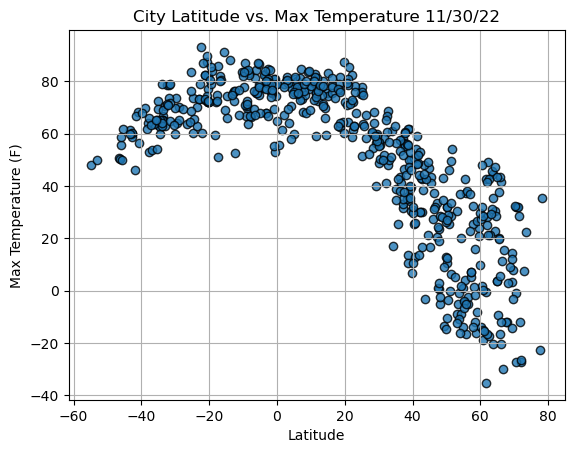

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

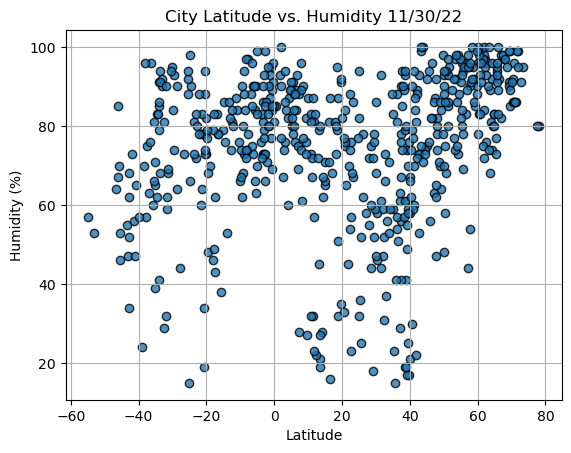

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

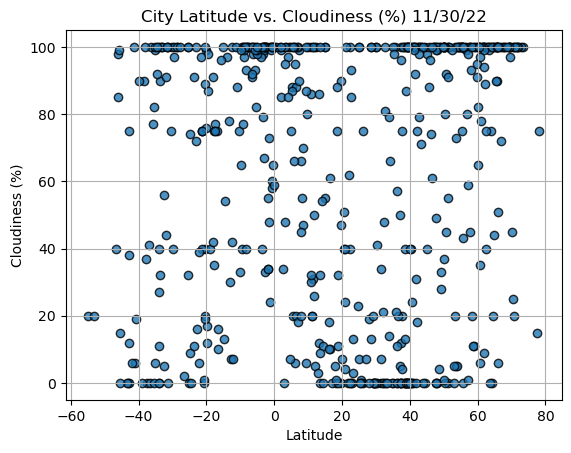

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

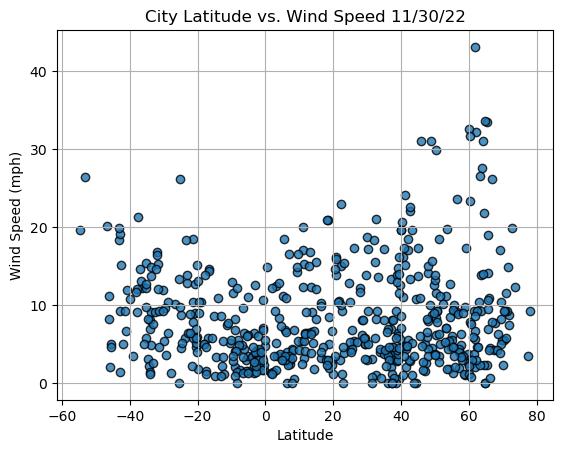

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bougouni,11.4170,-7.4790,75.07,32,31,3.15,ML,2022-12-01 00:57:14
1,Nouadhibou,20.9310,-17.0347,64.53,75,4,16.22,MR,2022-12-01 00:55:18
3,Waverly,42.7392,-84.6208,29.98,73,100,22.06,US,2022-12-01 00:57:15
5,Norman Wells,65.2820,-126.8329,-9.36,77,100,2.30,CA,2022-12-01 00:57:16
6,Glendive,47.1053,-104.7125,20.48,63,100,5.01,US,2022-12-01 00:57:17


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

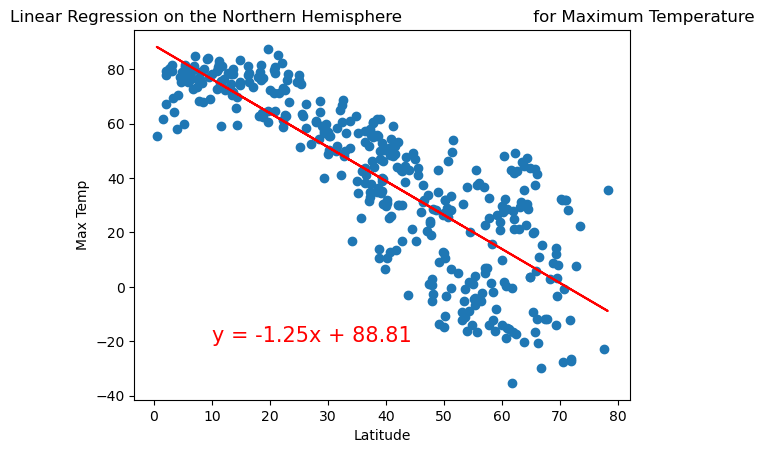

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-20))

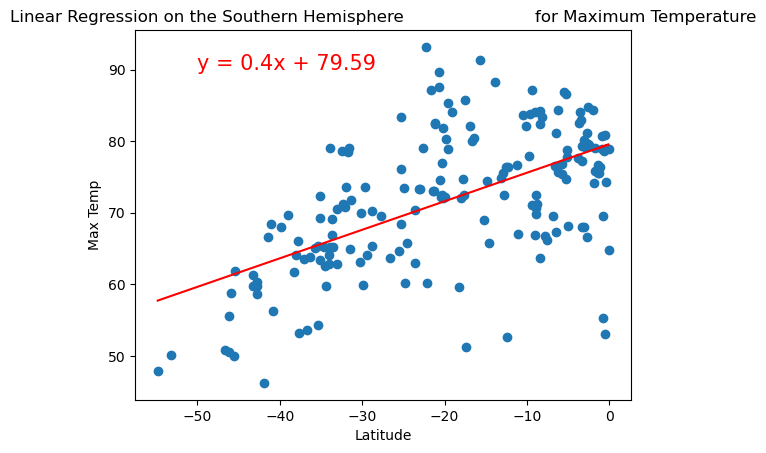

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

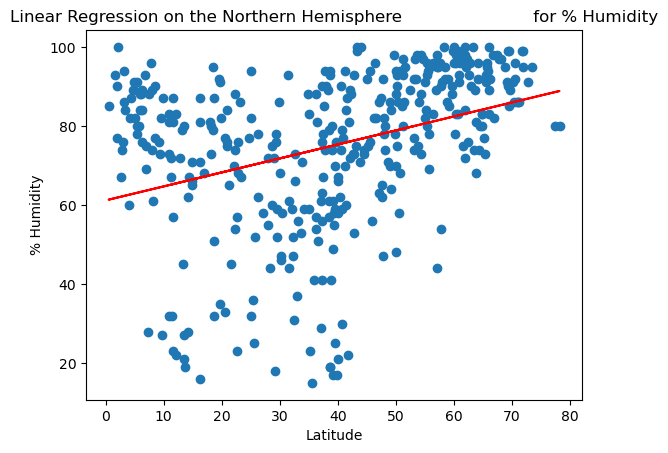

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

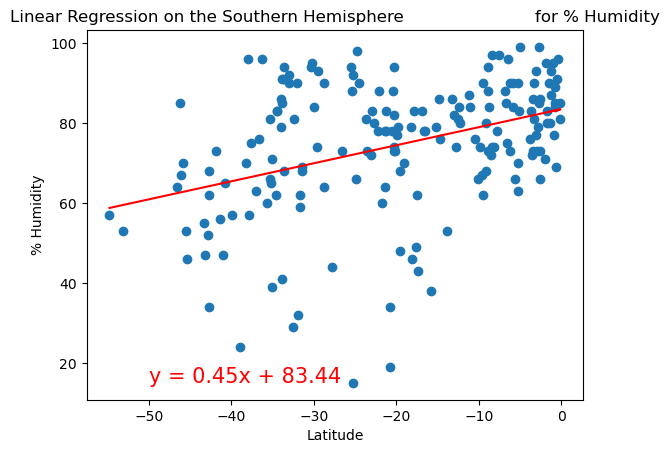

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

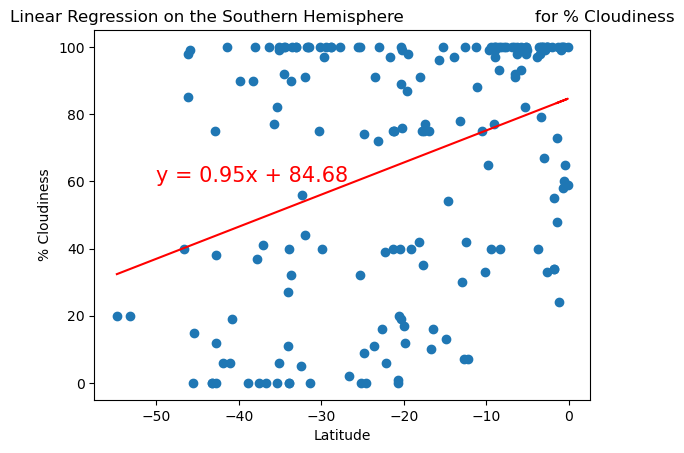

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

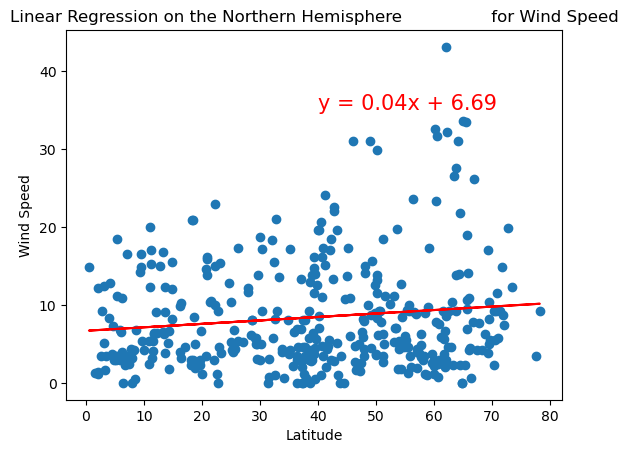

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                for Wind Speed', 'Wind Speed',(40,35))

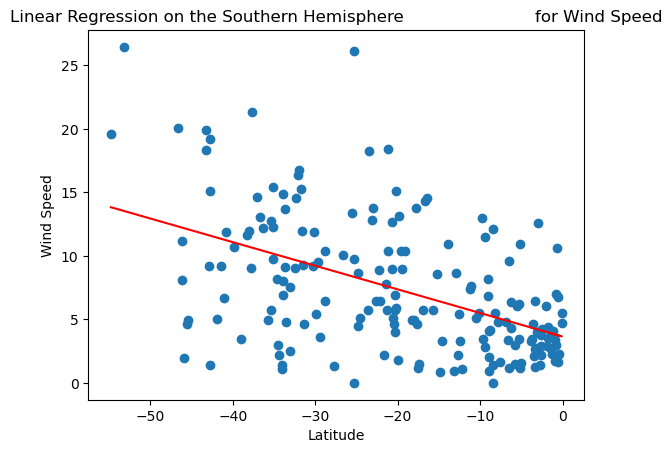

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))